# Описание Проекта 

**Предсказание снижения финансовой активности в интернет магазине «В один клик»**

---
**Описание иследования.**

Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Привлекать новых клиентов уже не так эффективно: о магазине и так знает большая часть целевой аудитории. Возможный выход — удерживать активность постоянных клиентов. Сделать это можно с помощью персонализированных предложений.

---
**Цель иследования.**

Провести анализ данных и при помощи алгоритмов МО найти признаки которые влияют на снижения активности 

---
**Задачи исследования.**

В первую очерядь нужно проверить и ознокмиться с данными. Далее необходимо провести иследовательский анализ. Затем нуно будет подобрать лучший алгоритм МО и в конце дать рекомендацию 

---
**Исходные данные.**

Данные были предоставленны в четырёх файлах. 
- market_file.csv
- market_money.csv
- market_time.csv
- money.csv

Боллее подробное описание будет в третьем разделе 

---

**Данное исследование разделим на несколько частей.**
1. <a href='#1'>Ипорт данных и необходимых библиотек</a>
2. <a href='#2'>Предобработка данных</a>
3. <a href='#3'>Исследовательский анализ данных</a>
4. <a href='#4'>Объединение таблиц</a>
5. <a href='#5'>Корреляционный анализ</a>
6. <a href='#6'>Пайплайн</a>
7. <a href='#7'>Анализ важности признаков</a>
8. <a href='#8'>Сегментация покупателей</a>
9. <a href='#9'>Общий вывод</a>

<div class="alert alert-warning">
<b>Комментарий 👉</b>

Очень не хватает введения. Рекомендовал бы сделать описание проекта, цели и задачи, способы решения. Небольшая вводная перед исследованием даст быстрое понимание о том, чему оно посвящено. 

Примерное оформление введения таково (это мой вариант):
    
____    
    
**Название проекта**
_____
**Описание исследования.**
    
_____
**Цель исследования.**
    
Суть исследования. Например: 

Провести анализ данных при помощи которых предприятие разработает стратегию взаимодействия с клиентами.
    
_____
**Задачи исследования.**

Действия, необходимые для достижения поставленной цели.
_____
**Исходные данные.**
    
Здесь описываешь исходные таблицы.
______

**Данное исследование разделим на несколько частей.**

***Часть 1. Изучение общей информации:***
* [1. Изученеие файлов с данными, получение общей информации, загрузка библиотек.](#1-bullet)
* [2. Нахождение и ликвидация пропусков.](#2-bullet)

***Часть 2. Подготовка данных:***
* [1. Приведение данных к нужным типам.](#3-bullet)
* [2. Нахождение и исправление аномалий и ошибок.](#4-bullet)

и т.д

Старайся выполнять свой проект в порядке, прописанном в твоем плане. Да, такое оформление займет больше времени, но затем позволит быстро и последовательно идти по шагам выполнения.
_________________

Обрати внимание, что пункты в частях у меня в виде ссылок. Это очень удобно, когда нужно переходить по разным частям проекта.
Вот тут почитай, как сделать <a href="https://sebastianraschka.com/Articles/2014_ipython_internal_links.html">кликабельные разделы</a>. Кликабельность сама по себе не обязательна, но план и цели, хотя бы кратко всегда прописывать желательно.

**Почему это важно?** Когда ты будешь в будущем выполнять тестовые задания, просто скопировав присланную тебе задачу и не составив плана, ты можешь этим смутить своего будущего работодателя. А чётко структурированный план покажет тебя как логично и системно думающего аналитика. Также такой подход научит тебя структурировать исследование и не путаться при работе с большими проектами.
</div>

<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='4682B4'><u><b>КОММЕНТАРИЙ СТУДЕНТА</b></u></font>
    <br />
    <font color='4682B4'>Done! Теперь буду использовать это как шаблон для будущих проектов </font>
</div>

### Ипорт данных и необходимых библиотек 
<a id='1'></a>

In [1]:
!pip install shap -q
!pip install --upgrade scikit-learn -q
import sklearn
sklearn.__version__

'1.5.1'

<div class="alert alert-warning">
<b>Комментарий 👉</b>

Полезный ключ **-q** (он "подавит" служебные сообщения об установке, которых может быть достаточно много - вплоть до нескольких экранов прокрутки).
</div>

<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='4682B4'><u><b>КОММЕНТАРИЙ СТУДЕНТА</b></u></font>
    <br />
    <font color='4682B4'>Done! </font>
</div>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import shap
import numpy as np
from sklearn.metrics import (
            accuracy_score,
            recall_score,
            r2_score,
            confusion_matrix,
            mean_squared_error,
            precision_score
)
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import (StandardScaler,
                                   MinMaxScaler,
                                   OneHotEncoder,
                                   OrdinalEncoder,
                                   LabelEncoder
                                  )
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import (train_test_split,
                                     RandomizedSearchCV)
from sklearn.impute import SimpleImputer

RANDOM_STATE = 42
import warnings
warnings.filterwarnings("ignore")

<div class="alert alert-success">
<b>ОТЛИЧНО! 👍</b>

Отлично, все импорты собраны в начале "тетрадки"!

---
В Python есть своя философия. Именно отсюда берутся определенные правила и стандарты. В пайтон такое соглашение назвали PEP8.

Соответствие PEP8 позволяет видеть основную структуру вашего кода другим разработчикам. Не нужно привыкать к другому оформлению кода. Если вы привыкли как-то оформлять код, а увидели что-то совершенно другое, то вы поймете. 

Официальная документация: https://peps.python.org/pep-0008/ 

Основные моменты и рекомендации:

- Используй пробелы, разрешается использование табов, но смешивание запрещено. Отступ соответствует 4 пробелам. Хорошие редакторы кода автоматически заменяют табы на пробелы.

- Вокруг операторов +, -, =, *, /, ** должны быть пробелы. 

- Строка не должна превышать 79 символов

- Ну и наконец про импорты: импорты можно делать только по одному на строку! При этом из одного модуля можно доставать несколько нужных объектов. Порядок тоже важен:

- импорты из стандартной библиотеки
- импорты из сторонних библиотек
- импорты пользовательских модулей текущего проекта (например если выносишь функции в отдельный модуль)

И нежелательно их перемешивать с константами и переменными.

p.s. состав стандартных библиотек Python здесь: [The Python Standard Library](https://docs.python.org/3/library/)
</div>

<div class="alert alert-warning">
<b>Комментарий 👉</b>

В ходе разработки я бы не стал "давить" предупреждения, чтобы посмотреть на то какие предупреждения мой код генерирует. Но всё это только до того момента, пока код не станет готовым для передачи в production.</div>

In [3]:
# Загрузка данных
market_file = pd.read_csv('/datasets/market_file.csv')
market_money = pd.read_csv('/datasets/market_money.csv')
market_time = pd.read_csv('/datasets/market_time.csv')
money = pd.read_csv('/datasets/money.csv',delimiter=';',decimal=',')

<div class="alert alert-success">
<b>ОТЛИЧНО! 👍</b>

Отлично. Импортировали требуемые для анализа библиотеки и загрузили данные. Сейчас посмотрим на их состояние и если всё ОК, сможем приступать к построению моделей....

p.s. при установке дополнительных библиотек (через ! pip install ...) можно использовать полезный ключ **-q** (он "подавит" служебные сообщения об установке, которых может быть достаточно много - вплоть до нескольких экранов прокрутки)

p.p.s. При считывании данных из файла здорово перестраховывать себя от ошибок, связанных, например, с неверным указанием пути к файлу. А иногда бывает, что работаешь с файлом локально, выгружаешь его на сервер, ожидая, что он будет принимать данные, которые лежат на том же сервере, а код падает с ошибкой, потому что путь к файлу не поменялся с локального на серверный.
    
Для этого, например, можно использовать конструкцию `try-except`: сначала пробуешь локальный путь, при возникновении ошибки используется серверный путь (подробнее можешь почитать тут: https://pythonworld.ru/tipy-dannyx-v-python/isklyucheniya-v-python-konstrukciya-try-except-dlya-obrabotki-isklyuchenij.html).
    
Но еще лучше использовать библиотеку `os` - её использование позволит тебе проверять существование указанных директорий (что может быть актуально при одновременной работа на локальном и сетевом окружении) и загружать данные из существующей директории, избегая ошибок. Как пример:
    
    import os

    pth1 = '/folder_1/data.csv'
    pth2 = '/folder_2/data.csv'
    
    if os.path.exists(pth1):
        query_1 = pd.read_csv(pth1)
    elif os.path.exists(pth2):
        query_1 = pd.read_csv(pth2)
    else:
        print('Something is wrong')

Ещё на этапе считывания данных можно спарсить дату: за это действие отвечает параметр `parse_dates` метода `read_csv()`, в него нужно передать список с названием полей-дат, и в большинстве случаев дата будет корректно преобразована в нужный формат сразу:)
Также на этапе считывания данных задать индекс-столбец- за это действие отвечает параметр `index_col`.
</div>

### Предобработка данных
<a id='2'></a>

In [4]:
for column in market_file.select_dtypes('object'):
    print(column,'\n',market_file[column].value_counts(),'\n')

Покупательская активность 
 Прежний уровень    802
Снизилась          498
Name: Покупательская активность, dtype: int64 

Тип сервиса 
 стандарт     914
премиум      376
стандартт     10
Name: Тип сервиса, dtype: int64 

Разрешить сообщать 
 да     962
нет    338
Name: Разрешить сообщать, dtype: int64 

Популярная_категория 
 Товары для детей                        330
Домашний текстиль                       251
Косметика и аксесуары                   223
Техника для красоты и здоровья          184
Мелкая бытовая техника и электроника    174
Кухонная посуда                         138
Name: Популярная_категория, dtype: int64 


In [5]:
# Колонка тип сервиса имеет имеет неправильное значение "стандартт"

market_file.loc[market_file['Тип сервиса']=='стандартт','Тип сервиса']='стандарт'

In [6]:
market_time['Период'].value_counts()

текущий_месяц       1300
предыдцщий_месяц    1300
Name: Период, dtype: int64

In [7]:
# В датасете market_time 'предыдущий_месяц' написан с ошибкой 
market_time.loc[market_time['Период']=='предыдцщий_месяц','Период']='предыдущий_месяц'

<div class="alert alert-success">
<b>ОТЛИЧНО! 👍</b>

Отлично, молодец, обнаружены 2 "разночтения" (**стандартт** и **предыдцщий_месяц**) - по факту в одних и тех же категориях в признаках.
</div>

#### Все четыре датасета
- Не имееют очевидных дублкатов
- Имеют правильную типизацию

<div class="alert alert-success">
<b>ОТЛИЧНО! 👍</b>

Хорошо, данные загрузили, первичные проверки сделали.
</div>

###  Исследовательский анализ данных
<a id='3'></a>

#### Клиенты с покупательской активностью не менее трёх месяцев

In [8]:
revenue_0 = market_money[market_money['Выручка']==0]['id'].unique()
market_file_1 = market_file.loc[~market_file['id'].isin(revenue_0)]

<div class="alert alert-success">
<b>ОТЛИЧНО! 👍</b>

Супер! Здесь молодец, НЕ УПУСКАЕШЬ требование брифа в части обработки покупателей НЕ имеющих полной покупательской истории в крайние 3 месяца:
    
</div>

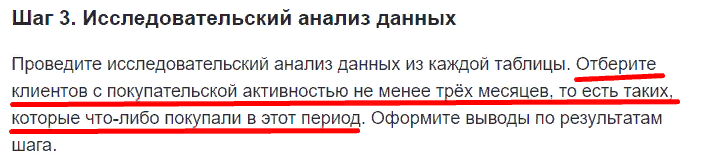

In [9]:
market_file_1.describe().T

,count,mean,std,min,25%,50%,75%,max
id,1297.0,215998.986893,374.578554,215349.00,215675.00,215999.00,216323.0,216647.00
Маркет_актив_6_мес,1297.0,4.254433,1.015618,0.90,3.70,4.20,4.9,6.60
Маркет_актив_тек_мес,1297.0,4.009252,0.696048,3.00,4.00,4.00,4.0,5.00
Длительность,1297.0,602.993832,249.101456,121.00,410.00,607.00,806.0,1079.00
Акционные_покупки,1297.0,0.320547,0.249657,0.11,0.17,0.24,0.3,0.99
Средний_просмотр_категорий_за_визит,1297.0,3.267540,1.354623,1.00,2.00,3.00,4.0,6.00
Неоплаченные_продукты_штук_квартал,1297.0,2.841172,1.973451,0.00,1.00,3.00,4.0,10.00
Ошибка_сервиса,1297.0,4.184271,1.950973,0.00,3.00,4.00,6.0,9.00
Страниц_за_визит,1297.0,8.186584,3.977061,1.00,5.00,8.00,11.0,20.00


In [10]:
market_file_1

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2
5,215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,216643,Прежний уровень,стандарт,да,6.6,3,318,0.24,Техника для красоты и здоровья,5,3,3,11
1296,216644,Прежний уровень,стандарт,нет,5.1,4,454,0.21,Домашний текстиль,6,2,3,9
1297,216645,Прежний уровень,стандарт,да,4.1,3,586,0.20,Домашний текстиль,3,2,5,7
1298,216646,Прежний уровень,стандарт,да,6.3,5,645,0.12,Техника для красоты и здоровья,3,3,5,7


In [11]:
discrete =['Маркет_актив_тек_мес','Средний_просмотр_категорий_за_визит','Неоплаченные_продукты_штук_квартал',
          'Ошибка_сервиса','Страниц_за_визит']
continuous = ['Маркет_актив_6_мес','Акционные_покупки','Длительность']

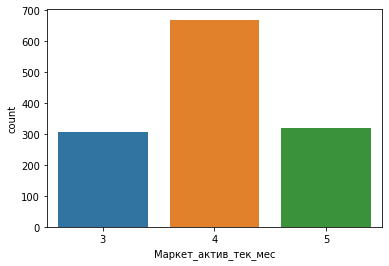

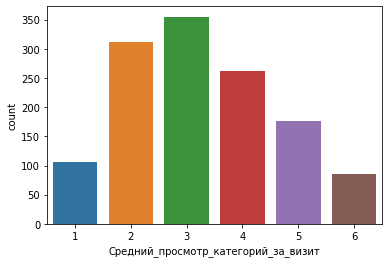

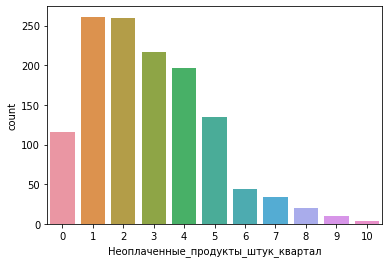

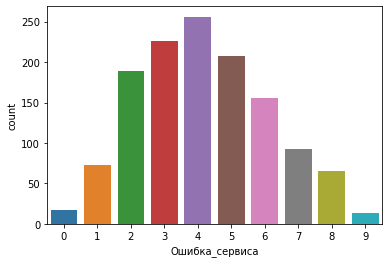

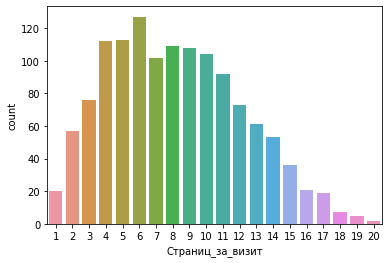

In [12]:
for column in discrete:
    sns.countplot(data=market_file_1,x=column)
    plt.show()

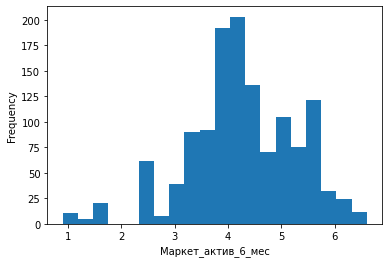

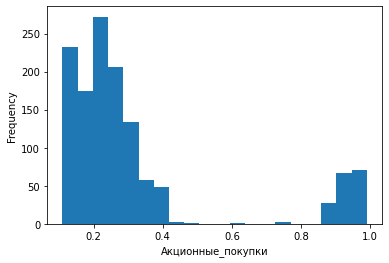

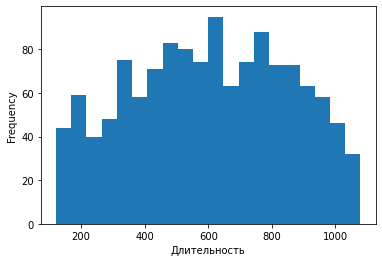

In [13]:
for column in continuous:
    market_file_1[column].plot(kind='hist',bins=20)
    plt.xlabel(column)
    plt.show()

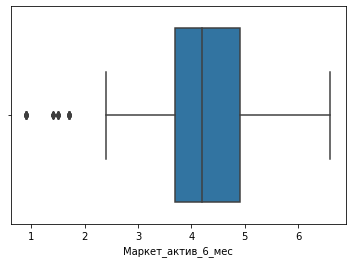

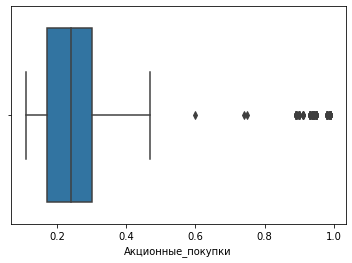

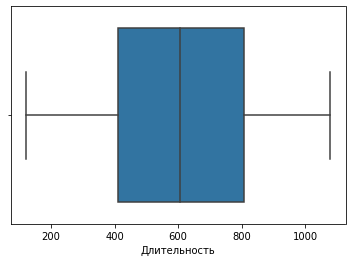

In [14]:
for column in continuous:
    sns.boxplot(data=market_file_1, x=column) 
    plt.xlabel(column)
    plt.show()

<div class="alert alert-warning">
<b>Комментарий 👉</b>

Ряд признаков в наших данных имеет дискретную природу (например это: 'Маркет_актив_6_мес', 'Средний_просмотр_категорий_за_визит', ... (*не привожу все названия из данных*)). Для графического анализа дискретных признаков нужнен тип графиков, который на каждое уникальные значение признака строит свою корзину. Например, можно использовать **sns.countplot** или **.plot(kind='bar')**. Ты же для визуализации их используешь гистограмму.
    
---
Гистограммы обычно хорошо подходят для визуализации распределения непрерывных числовых признаков. Это могут быть такие признаки, как возраст, доход, количество продуктов в корзине, и т.д. Гистограммы помогают наглядно представить, как значения признака распределены по диапазону.

Для дискретных признаков, особенно если их значения ограничены и могут быть перечислены (например, категории, группы), столбчатые диаграммы или другие методы визуализации, такие как круговые диаграммы или ящики с усами, могут быть более подходящими.

Конечно, если у тебя есть дискретный признак, который принимает большое количество разных значений, и ты хочешь понять их распределение, ты можешь попробовать использовать гистограмму, но при этом учти, что столбцы будут разреженными и могут не давать полного представления о распределении.

**Важно подбирать подходящий тип графика в зависимости от природы данных и целей визуализации.**    
</div>

<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='4682B4'><u><b>КОММЕНТАРИЙ СТУДЕНТА</b></u></font>
    <br />
    <font color='4682B4'>Done! </font>
</div>

<div class="alert alert-success">
<b>КОММЕНТАРИЙ V2</b> 	

Отлично, спасибо что НЕ проигнорировал! Обычно НИКТО не исправляет гистограммы.
</div>

<div class="alert alert-warning">
<b>Комментарий 👉</b>

Пожалуйста "доведи" график(и), так, чтобы эта похвала ниже стала заслуженной ))))   
    
---    
**Просто супер: график подписан, оси подписаны (проверь - так ли это в твоем случае?)**. Не часто на самом деле такой скрупулёзный подход к оформлению встречается. Молодец! Также, здорово, что есть объяснение поведения данного графика. Пытаться понять полученный результат - важная часть работы аналитика.

Я закончил физико-математический факультет Петрозаводского государственного университета. Нас там с первого курса приучили - если на сдачу лабораторной работы по физике приходишь с графиком, на котором не подписано общее название, названия осей (с единицами измерений), единичная шкала - всё сдача заканчивается не начавшись. Или если у моей лабораторной работы отсутствует вывод: что делали? по какой методике? что "намеряли"? как интерпретировали? какой финальный вывод? - всё, тоже на выход. Ну и в принципе сейчас, на текущей работе: код, который написан в тетрадке мало кому понятен и не сильно кому интересен. Важнее детальные выводы и тренды, которые попадут на слайд презентации в PowerPoint. Именно поэтому столь важное значение в аналитике данных придается промежуточным выводам и уж тем более финальному. 
</div>

<div class="alert alert-warning">
<b>Комментарий 👉</b>

Совет - вместе с гистограммами следует использовать также и boxplot'ы ("ящики с усами" покажут и выбросы и основные статистики данных (квартили)). Почему гистограмму и ящик с усами надо использовать вместе? Первый хорошо показывает бимодальность, второй бимодальность не видит, но хорошо видит выбросы.
</div>

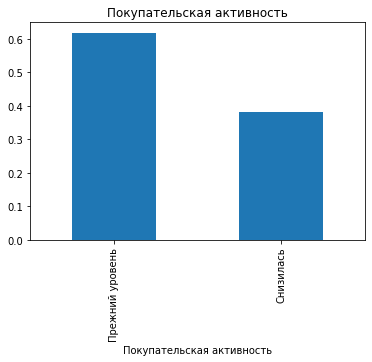

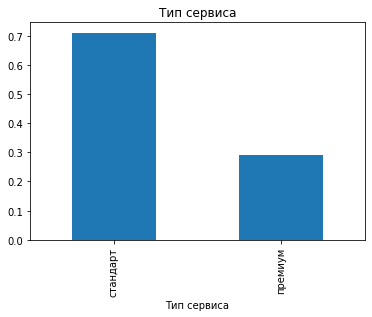

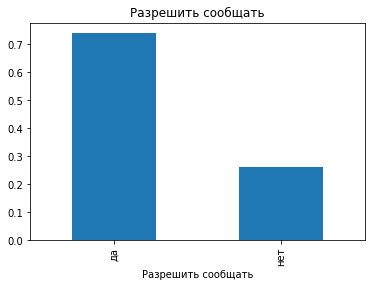

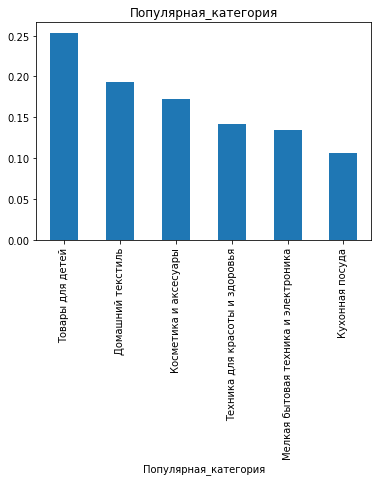

In [15]:
for column in market_file_1.select_dtypes('object').columns:
    market_file_1[column].value_counts(normalize=True).plot(kind='bar',title=column)
    plt.xlabel(column)
    plt.show()

<div class="alert alert-warning">
<b>Комментарий 👉</b>



Наблюдаешь ли дисбаланс в целевой переменной (таргете)? Если наблюдаешь, то как этот факт отражается на выборке метрики для моделей МО?
</div>

<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='4682B4'><u><b>КОММЕНТАРИЙ СТУДЕНТА</b></u></font>
    <br />
    <font color='4682B4'>Done! </font>
</div>

Market File
- У 30% пользователей снизилась покупательная активность 
- Почти 30% имееют премиум подписку
- В топ 3 категории по популярности входят "Товары для детей", "Домашний текстиль","Косметика и аксесуары"
- Наблюдается не совсем большой дисбаланс в целевой переменной, из-за этого некоторые метрики вроде Accuracy могут выдавать неадекватно высокое качество модели 

<div class="alert alert-success">
<b>КОММЕНТАРИЙ V2</b> 	

Да, верно! Только не accuracy ))) Эта метрика в условиях дисбаланса классов ничего о производительности модели не скажет. Почему так? Представим, у нас есть модель, которая обучается на датасете, где 95% примеров принадлежат к классу A, а оставшиеся 5% - к классу B. Если модель просто всегда предсказывает класс A, она достигнет accuracy в 95%, что может показаться впечатляющим результатом.

Однако, с точки зрения решаемой задачи, модель практически бесполезна, потому что она не улавливает примеры класса B. В случае дисбаланса классов, когда один класс сильно преобладает, метрика accuracy может быть высокой даже для моделей, которые не выполняют задачу правильно.

Вместо accuracy в таких случаях рекомендуется использовать другие метрики, такие как:

* Precision (точность): Показывает, какая доля положительных предсказаний верна.

* Recall (полнота): Показывает, какая доля истинных положительных примеров была уловлена моделью. 

* F1-мера: Сочетание точности и полноты.

* Матрица ошибок (Confusion Matrix): Позволяет увидеть, какие именно ошибки совершает модель, а не просто общую долю правильных предсказаний.

Эти метрики более информативны в контексте задач с дисбалансом классов, поскольку они учитывают различные аспекты работы модели и ее способность корректно предсказывать оба класса.
</div>


<div class="alert alert-warning">
<b>Комментарий 👉</b>

**Количественные данные в таблице имеют нормальное распределенние, кроме признака Акционные_покупки** - в наших данных нет ни одного признака с нормальным распределением. Ты можешь проверить мои слова.

У нормального распределения не может быть никаких **скосов/смещений/мультимод/ассиметрии/выбросов** - нормальное распределение **АБСОЛЮТНО СИММЕТРИЧНОЕ**.

---
(Не)нормальность распределения данных проверяешь "на глаз", но это несколько некорректно - есть вероятность ошибки (понятно что не в нашем случае - тут всё ясно ... но вот в случае распределения похожего на Гауссиану). Что надо сделать чтобы строго подтвердить или опровергнуть нормальность распределения случайной величины?

Вот полезные материалы материалы на эту тему: https://education.yandex.ru/handbook/data-analysis/article/bazovye-statisticheskie-testy и https://education.yandex.ru/handbook/data-analysis/article/bazovye-statisticheskie-testy-v-python

</div>

In [16]:
market_money.describe()

,id,Выручка
count,3900.000000,3900.000000
mean,215997.500000,5025.696051
std,375.325686,1777.704104
min,215348.000000,0.000000
25%,215672.750000,4590.150000
50%,215997.500000,4957.500000
75%,216322.250000,5363.000000
max,216647.000000,106862.200000


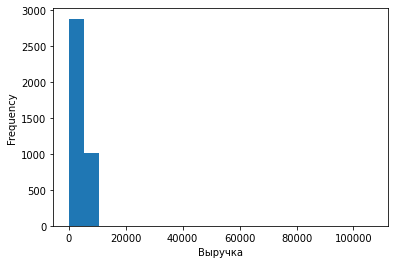

In [17]:
for column in market_money.drop('id',axis=1).select_dtypes('number').columns:
    market_money[column].plot(kind='hist',bins=20)
    plt.xlabel(column)
    plt.show()

In [18]:
market_money[market_money['id']==215380]

,id,Период,Выручка
96,215380,препредыдущий_месяц,5051.0
97,215380,предыдущий_месяц,6077.0
98,215380,текущий_месяц,106862.2


In [19]:
market_file.loc[market_file['id']==215380]

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
32,215380,Снизилась,премиум,нет,1.7,4,637,0.94,Техника для красоты и здоровья,3,2,4,7


Market Money
- В датасете market_money, покупатель под id 215380 имеет аномальное значение, это может плохо отразиться на работе модели 

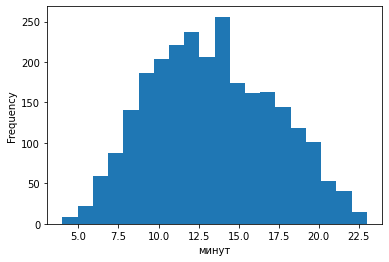

In [20]:
for column in market_time.drop('id',axis=1).select_dtypes('number').columns:
    market_time[column].plot(kind='hist',bins=20)
    plt.xlabel(column)
    plt.show()

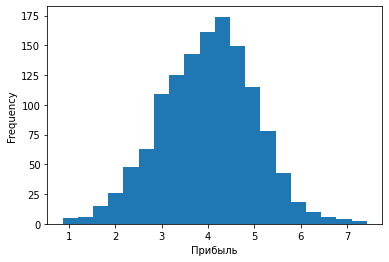

In [21]:
money['Прибыль'].plot(kind='hist',bins=20)
plt.xlabel('Прибыль')
plt.show()

Market Time / Money
- Значение в датасетах market_time и money распределенны нормально 

<div class="alert alert-warning">
<b>Комментарий 👉</b>

**Значение в датасетах market_time и money распределенны нормально** - нет.
</div>

### Объединение таблиц
<a id='4'></a>

In [22]:
market_money_pivot = market_money.pivot_table(index='id',columns='Период', values='Выручка').reset_index()
market_time_pivot = market_time.pivot_table(index='id',columns='Период', values='минут').reset_index()
merged = market_money_pivot.merge(market_time_pivot,on='id', suffixes=('_прибыль','_минут'))
merged.rename(columns={'препредыдущий_месяц':'препредыдущий_месяц_прибыль'},inplace=True)
merged.head()

Период,id,предыдущий_месяц_прибыль,препредыдущий_месяц_прибыль,текущий_месяц_прибыль,предыдущий_месяц_минут,текущий_месяц_минут
0,215348,0.0,0.0,3293.1,13,14
1,215349,5216.0,4472.0,4971.6,12,10
2,215350,5457.5,4826.0,5058.4,8,13
3,215351,6158.0,4793.0,6610.4,11,13
4,215352,5807.5,4594.0,5872.5,8,11


In [23]:
market_file.shape

(1300, 13)

In [24]:
df = market_file.merge(merged,on='id')
df = df.merge(money,on='id')

In [25]:
df.shape

(1300, 19)

<div class="alert alert-success">
<b>ОТЛИЧНО! 👍</b>

Есть, отлично! Из "длинного" датафрейма сделали "широкий". Ровно то, что и требуется:
    
</div>

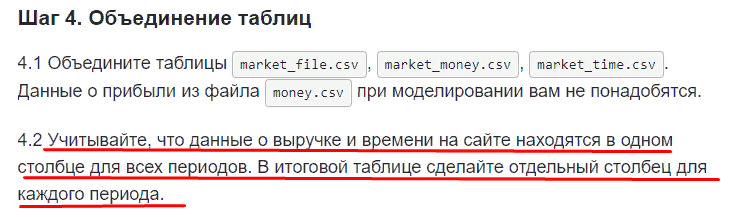

<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='4682B4'><u><b>КОММЕНТАРИЙ СТУДЕНТА</b></u></font>
    <br />
    <font color='4682B4'>Done! </font>
</div>

<div class="alert alert-warning">
<b>Комментарий 👉</b>

В случае объединения/слияния датафреймов рекомендую тебе смотреть на размерости датафреймов ДО слияния и ПОСЛЕ него. В подобных операциях часто ошибки бывают.
</div>

### Корреляционный анализ
<a id='5'></a>

<div class="alert alert-success">
<b>ОТЛИЧНО! 👍</b>

Смотришь скоррелированность признаков - отлично! Об этом чуть ниже подробней напишу....

---
p.s. присмотрись к библиотеке phik! Она (Phi_K correlation) представляет собой инструмент для вычисления и визуализации корреляции между категориальными и количественными переменными. Она может быть полезной в анализе данных перед построением моделей машинного обучения, так как позволяет обнаружить скрытые взаимосвязи между переменными, которые могли бы остаться незамеченными при обычных методах корреляционного анализа.
Преимущества использования **phik**:

1. **Учет категориальных переменных**: Традиционные методы вычисления корреляции, такие как коэффициент корреляции Пирсона, применяются только к количественным переменным. phik позволяет вычислять корреляцию между категориальными и количественными переменными, что делает его мощным инструментом для анализа разнообразных типов данных.

2. **Обнаружение нелинейных зависимостей**: phik способен обнаруживать нелинейные связи между переменными, которые могли бы быть упущены традиционными методами. Это особенно важно в анализе данных, где зависимости могут быть сложными и нелинейными (что может влиять на твой выбор признаков для моделей МО).

3. **Подходит для больших наборов данных**: phik обладает хорошей масштабируемостью, что позволяет использовать его для анализа больших наборов данных без серьезного снижения производительности.

4. **Визуализация результатов**: Библиотека предоставляет инструменты для визуализации матрицы корреляции между переменными, что помогает лучше понимать зависимости в данных.

Вот пример кода, как использовать phik для вычисления корреляции:
    
    # Установим "руками", если не установлена
    !pip install phik -q

    # Импортируем
    import phik
    import pandas as pd

    # Загрузка данных
    data = pd.read_csv('data.csv')

    # Вычисление матрицы корреляции с использованием phik
    corr_matrix = data.phik_matrix(interval_cols= ...)

    # Визуализация матрицы корреляции
    import seaborn as sns
    import matplotlib.pyplot as plt

    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    plt.title('Phi_K Correlation Matrix')
    plt.show()

p.s. у этой библиотеки есть ограничение с которым я например сталкивался: когда в даных есть столбцы с очень большим количеством уникальных значений, то phik может "упасть" с сообщением об ошибке (суть которого в том, что не хватает памяти для обработки такого количества "уников"). ПРи этом на компьютере у меня 32 Гб памяти и большая часть её не занята. Я подозреваю что это некое внутреннее ограничение библиотеки.
</div>

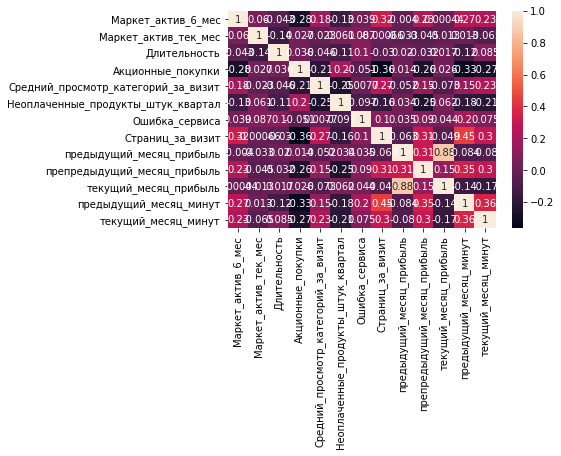

In [26]:
sns.heatmap(df.drop(['id','Прибыль'],axis=1).corr(method='spearman'), annot=True)
sns.set_theme(rc={'figure.figsize':(15,20)})
plt.show()

<div class="alert alert-success">
<b>ОТЛИЧНО! 👍</b>

Есть, отлично, понимание структуры данных дает нам основание использовать метод Спирмена/Кендалла, а не Пирсона (при оценки степени корреляции признаков).

Присоединяю табличку в помощь (и для последующих повторных обращений к ней):
</div>

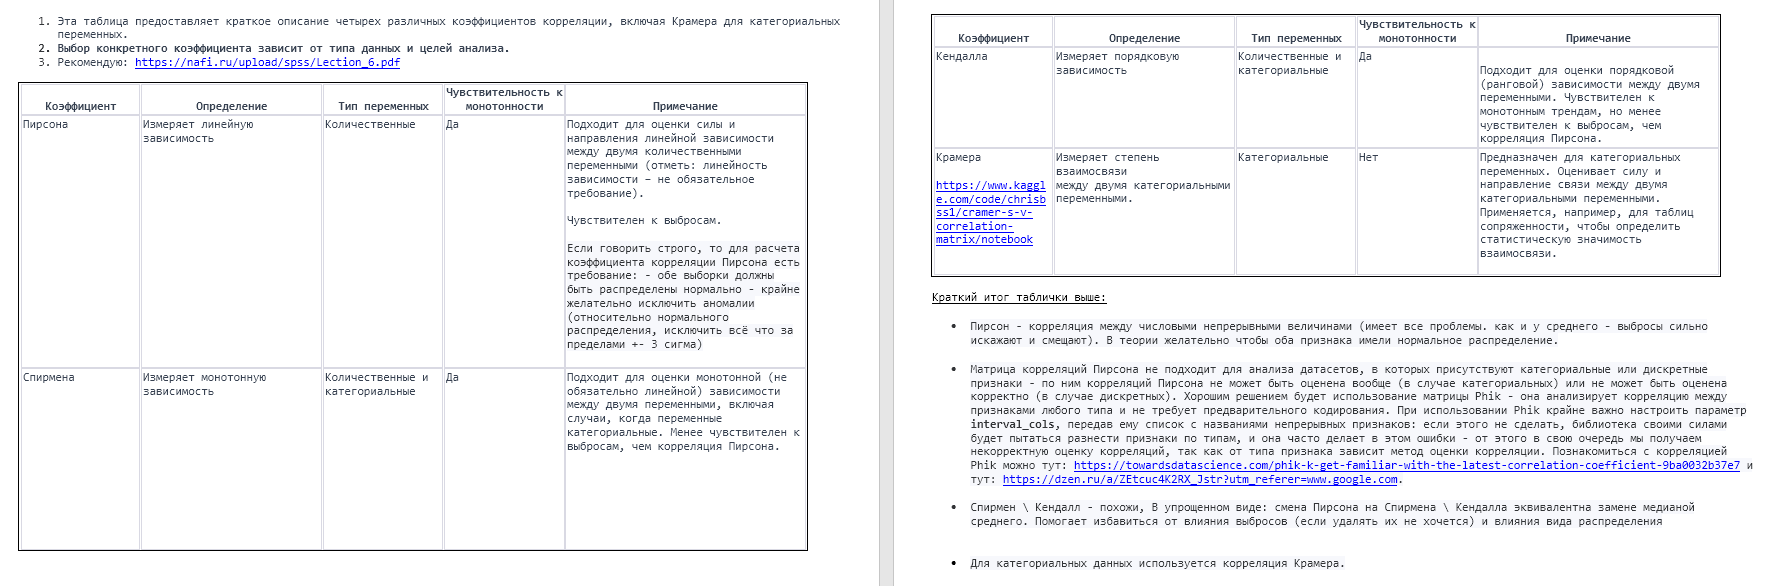

Высокая мультиколлинеарность наблюдается между признаками текущий_месяц_прибыль и предыдущий_месяц_прибыль. Можем убрать признак текущий_месяц_прибыль чтобы избежать лишний шум 

<div class="alert alert-warning">
<b>Комментарий 👉</b>

В задаче классификации, когда в данных несколько классов (как у нас: "активность снизилась" и "активность преждняя"), рекомендовал бы построить хитмап отдельно для каждого класса. Если это делать на данных одновременно для 2х (и более классов - такие могут быть ситуации), то "картинка может быть смазанной"! Очень легко НЕ УВИДЕТЬ взаимосвязи (*только не надо трактовать эти взаимосвязи как **зависимости, которые объясняют** причинно-следственную связь между переменными*) присущие тому или иному классу.

p.s. если ты спросишь: *разве корреляция будет просчитываться, если мы будем ее считать отдельно для каждого класса? Насколько я понял- ты предлагаешь просчитать корреляцию отдельно для "единиц" и "нулей", но если в колонке будет всего одно значение - разве будет хоть что-то с ним коррелировать?*, то будешь абсолютно прав: **если в колонке есть только одно значение (например, все значения равны 1 или все равны 0) для определенного класса, то корреляция будет равна нулю. Это связано с отсутствием вариации в данных**.

Но я выше не про расчет коэффициентов говорю, а про визуальный анализ того, какие признаки оказывают влияние на каждый из классов: "активность снизилась" и "активность преждняя".

Проанализировав отдельные хитмапы, ты можешь выделить те признаки, которые оказывают влияние внутри каждого из классов таргета. Это может помочь в понимании важности определенных характеристик для принятия решения моделью.
</div>

In [27]:
del df['текущий_месяц_прибыль']

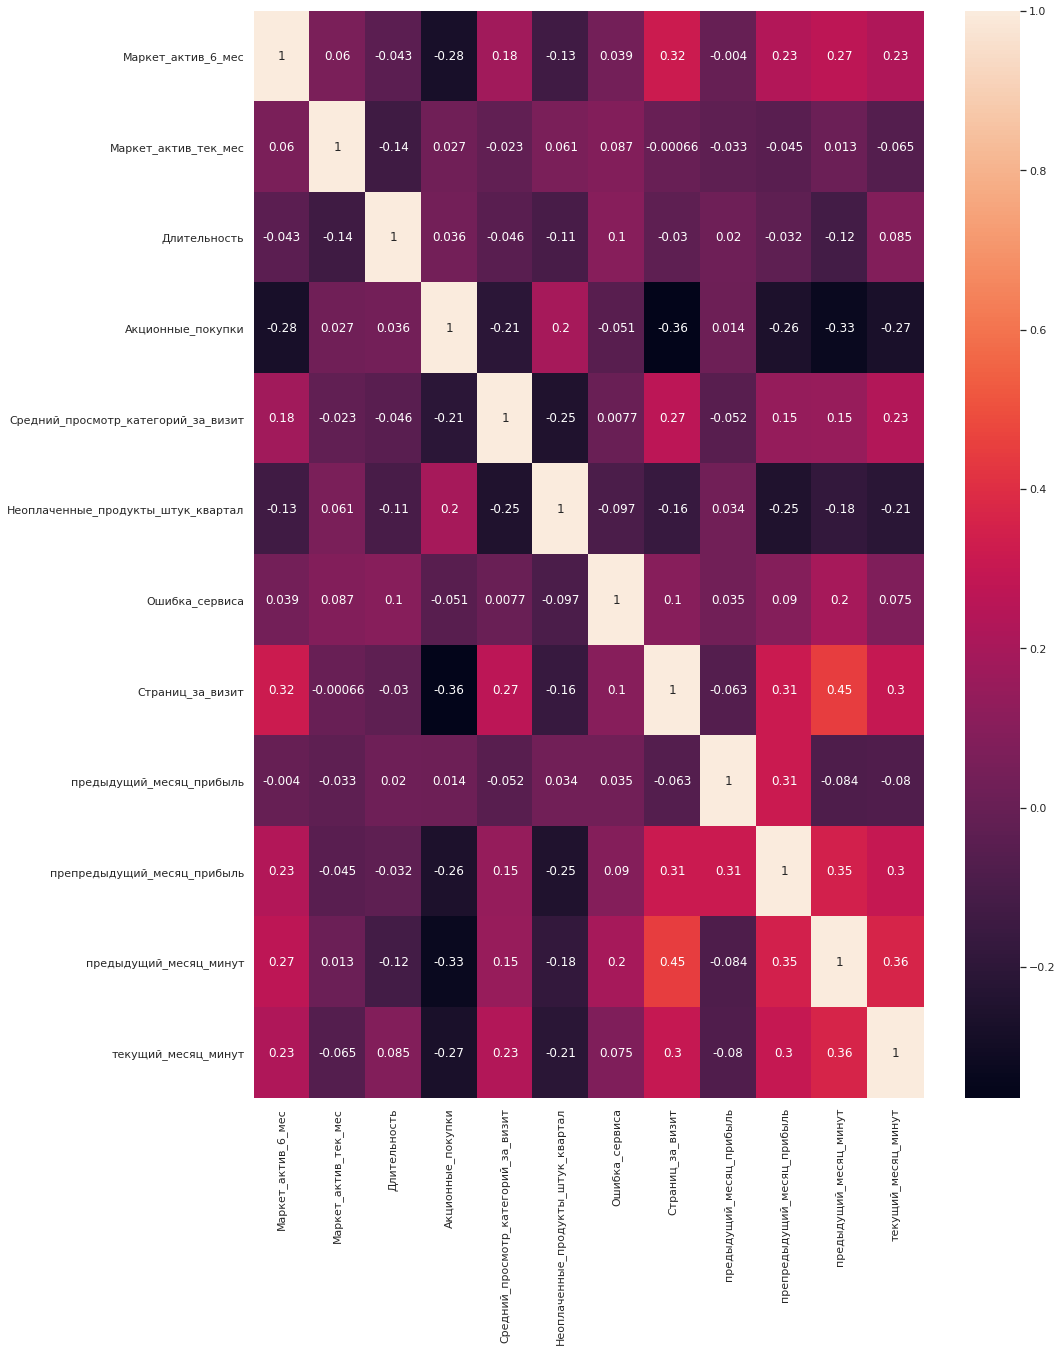

In [28]:
sns.heatmap(df.drop(['id','Прибыль'],axis=1).corr(method='spearman'), annot=True)
sns.set_theme(rc={'figure.figsize':(15,20)})
plt.show()

<div class="alert alert-success">
<b>ОТЛИЧНО! 👍</b>

Данные загружены, отлично.

Хорошо, что применяешь метод .head()/.sample() таким образом в память не будет загружен весь датасет, объем которого может быть огромным.

Методы .info, .describe, .value_counts(), .unique() как правило часто встречаются и обязательны к применению в задачах по исследованию данных, ведь с их помощью можно получить первые инсайты. 

Итак, мы провели предварительный анализ данных, проверили данные на наличие пропусков и затем обработали их (аргументированно заполнили / удалили / оставили как есть). Теперь можно приступать собственно к анализу данных и ответам на вопросы проекта.

</div>

<div class="alert alert-warning">
<b>Комментарий 👉</b>

Несколько моментов "на будущее" (сейчас забегаю чуть вперед, но будущем это будет важно) которые я хотел озвучить перед переходом к собственно исследованию (некоторые из этих моментов в твоем проекте реализованы):
    
- имеет смысл критично посмотреть на данные с точки зрения наличия пропусков в признаках (вопрос: все ли ml-модели "любят" пропуски?) и обработать или удалить их 
    
- имеет смысл явно обозначить какую задачу мы будем решать: с учителем / без учителя, классификации / регрессии ...
    
- в моделях бинарной классификации (если бы это был бы наш случай!) имеет смысл смотреть на баланс классов. Два взгляда (с разных сторон) на эту проблему тут: https://alexanderdyakonov.wordpress.com/2021/05/27/imbalance/ и https://habr.com/ru/post/349078/
    
- имеет смысл смотреть на корреляцию признаков. При высокой их степени коррелированности возникает проблема  мультиколлиниарность признаков. Проблема "мультиколлинеарности" это и про переобучение модели и про её интерпретируемость и про сложность модели (содержание в модели избыточного количества переменных). В чем негативный эффект сложной модели? Вот в чем: усложняется интерпретация параметров, оценки параметров ненадежны – получаются большие стандартные ошибки, которые меняются с изменением объема наблюдений, что делает модель регрессии непригодной для прогнозирования.

<br>
<br>
<details>
<summary style="color: blue; font-size: 18px; font-weight: bold;">▶ <u>Подробнее ...</u></summary>

Вот несколько причин, почему проблема мультиколлинеарности (МК) важна:

1. Неоднозначность коэффициентов: МК делает оценку коэффициентов модели неустойчивой. Когда существует сильная корреляция между признаками, модель становится неспособной разделить влияние каждого признака на целевую переменную. Это может привести к неоднозначным и неправильным оценкам коэффициентов, что затрудняет интерпретацию важности каждого признака. Согласись - это важно, чтобы результат, который выдает модель можно было бы понять и объяснить с точки зрения предметной области. В случае включения в модель высокоскоррелированных признаков - может случиться так, что коэффициенты (да, проблема присуща моделям линейным ... регрессия среди них!) могут менять знаки и попытка объяснения предметной области с помощью этих коэффициентов будет противоречить здравому смыслу.

2. Плохая обобщающая способность: МК может снизить способность модели обобщаться на новые данные. Когда сильно коррелированные признаки присутствуют в модели, модель может стать "перегенерированной" и склонной к переобучению на обучающих данных. В результате модель может показывать хорошую производительность на обучающих данных, но плохо обобщаться на новые данные.

3. Ухудшение точности и устойчивости модели: МК может привести к численным проблемам при решении линейных уравнений, используемых для оценки коэффициентов модели. Это может привести к нестабильности и неточности оценок. Кроме того, небольшие изменения в данных могут привести к большим изменениям в оценках коэффициентов модели, что делает модель неустойчивой.

4. Избыточность информации: Когда признаки сильно коррелированы, они предоставляют практически одинаковую информацию о целевой переменной. Такая избыточность может привести к неэффективности модели и увеличению сложности модели без значительного улучшения производительности.

В целом, МК может иметь отрицательное влияние на производительность, стабильность, интерпретируемость и обобщающую способность.
    
---
Для деревянных моделей и моделей градиентного бустинга проблема МК  не является такой критической, как для линейных моделей. Вот несколько причин:

1. Нелинейность: Деревянные модели и модели градиентного бустинга являются нелинейными моделями. Они способны обрабатывать сложные взаимодействия между признаками и целевой переменной. В отличие от линейных моделей, они могут более гибко адаптироваться к наличию мультиколлинеарности в данных.

2. Рекурсивное разбиение: Деревья принятия решений в деревянных моделях и моделях градиентного бустинга используют рекурсивное разбиение для разделения данных на более чистые группы. Это означает, что деревья могут независимо выбирать разные признаки для разделения, даже если они сильно коррелированы. Таким образом, деревья могут игнорировать мультиколлинеарность и использовать другие признаки для принятия решений.

3. Ансамбль деревьев: Модели градиентного бустинга строятся на основе ансамбля слабых деревьев решений. Каждое дерево добавляется постепенно для уменьшения ошибки предыдущих деревьев. Это позволяет модели градиентного бустинга восстанавливать ошибки, вызванные мультиколлинеарностью, поэтапно улучшая прогнозы.

Хотя мультиколлинеарность не является проблемой в деревянных моделях и моделях градиентного бустинга в той же степени, что и в линейных моделях, она все еще может оказывать влияние на производительность и интерпретируемость модели. Сильно коррелированные признаки могут вносить избыточность в модель и увеличивать сложность, не принося значительного улучшения в прогнозах. Поэтому, хотя деревья могут быть более устойчивыми к мультиколлинеарности, все же рекомендуется выполнять анализ корреляции признаков и, при необходимости, применять методы снижения размерности или регуляризации для улучшения модели.
    
Вот классная статья. Простым языком, на примере показана проблема. А также, что важно - разобраны варианты как её (проблему) победить. Статья: https://habr.com/ru/company/akbarsdigital/blog/592493/ 
    
</details>
<br>
<br>    
</div>

### Пайплайн
<a id='6'></a>

В качестве метрики будем использовать recall, так как мы заинтересованы минимизировать FN 

<div class="alert alert-success">
<b>ОТЛИЧНО! 👍</b>

Есть, ОТЛИЧНО! Вижу обоснование выбора и использования конкретной ml-метрики в твоем проекте!
</div>

In [29]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['id','Покупательская активность','Прибыль'], axis=1)
                                                    , df['Покупательская активность']
                                                    , random_state=RANDOM_STATE
                                                    , test_size=0.25
                                                   , stratify=df['Покупательская активность'])
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test) 

<div class="alert alert-success">
<b>ОТЛИЧНО! 👍</b>

1. Здесь хорошо, происходит фиксация random_state. Воспроизводимость результатов разбиения выборки на обучающую (тренировочную) / тестовую мы обеспечили, значит при всех последующих запусках нашего кода подвыборки будут идентичными.
    
2. Доли размеров train/test 3:1 - хорошо.

3. Молодец что используешь параметр stratify. Использование stratify позволит сохранить баланс меток классов 1/0 ("снизится"/"не снизится") в 2х выборках (этот момент важен **особенно** в случае сильного дисбаланса классов в данных). Но конечно stratify это "не про" решение проблемы с "выравниванием" количества строк (с определенным классом) именно в данных.
</div>

<div class="alert alert-success">
<b>ОТЛИЧНО! 👍</b>

Кодирование таргета нельзя делать "руками":

- при появлении новых значений категориальных признаков, не предусмотренных твоим решением, модель или упадёт, или будет генерировать ошибки;
- такое решение не сделаешь частью пайплайна, а все современные решения базируются на них.
    
Поэтому кодирование нужно делать только с применением обучаемых трансформеров. Для кодирования целевого признака нужно использовать LabelEncoder (сокращаю до LE): https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html.

p.s. если стоит вопрос в том, что тебе не нравиться, что LE, например, присваивает классу "снизилась" метку 0, а "прежний уровень" - метку 1, то значения меток можно инвертировать с помощью небольшого лайфхака:

        import numpy as np

        # Пример преобразованных классов
        target = np.array([0, 1, 1, 0, 1, 0])

        # Инвертирование классов
        inverted_target = 1 - target

        print("Исходные классы:", target)
        print("Инвертированные классы:", inverted_target)

В этом примере переменная inverted_target будет содержать те же значения, что и target, но значения будут инвертированы.

p.p.s. есть ещё метод invert_transform()
</div>

In [30]:
ohe_columns = ['Разрешить сообщать','Популярная_категория']
ord_columns = ['Тип сервиса']
num_columns = ['Маркет_актив_6_мес', 'Маркет_актив_тек_мес', 'Длительность',
       'Акционные_покупки', 'Средний_просмотр_категорий_за_визит',
       'Неоплаченные_продукты_штук_квартал', 'Ошибка_сервиса',
       'Страниц_за_визит', 'предыдущий_месяц_прибыль',
       'препредыдущий_месяц_прибыль', 'предыдущий_месяц_минут',
       'текущий_месяц_минут']

In [31]:
ohe_pipeline = Pipeline(
    [('simpliImputer_ohe', SimpleImputer(strategy='most_frequent', missing_values=np.nan)),
     ('ohe', OneHotEncoder(drop='first',handle_unknown='ignore',sparse_output=False))
    ]
)


ord_pipeline = Pipeline(
    [('simpliImputer_ord_before', SimpleImputer(strategy='most_frequent', missing_values=np.nan)),
     ('ord', OrdinalEncoder(
     categories=[
         ['стандарт','премиум']
     ],handle_unknown='use_encoded_value', unknown_value=np.nan)),
     ('simpliImputer_ord_after', SimpleImputer(strategy='most_frequent', missing_values=np.nan))
    ]
)

data_preprocessor = ColumnTransformer(
[('ohe', ohe_pipeline, ohe_columns),
 ('ord', ord_pipeline, ord_columns),
 ('num', StandardScaler(), num_columns)
], remainder='passthrough'

)
pipe_final = Pipeline(
    [
        ('preprocessor', data_preprocessor),
        ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
    ]
)

param_grid = [
    #DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2,5),
        'models__max_features': range(2,5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    
    #KNeighborsClassifier() 
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2,5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']   
    },

    #LogisticRegression()
    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE, 
            solver='liblinear', 
            penalty='l2'
        )],
        'models__C': range(1,5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    }
]

<div class="alert alert-danger">
<b>Необходимо исправить ❌</b>



Стоит настроить работу энкодера OneHotEncoder на работу с неизвестными значениями признаков - сейчас энкодер "при встрече с неизвестной категорией" (это может случиться в проде) - будет выбрасывать ошибку. Для непрерывности процесса моделирования можно настроить параметр **handle_unknown='ignore'**, чтобы новые, ранее неизвестные значения игнорировались и не включались в итоговую матрицу.

Также среди параметров OneHotEncoder должен присутствовать **drop='first'** (иначе будет так называемая "дамми-ловушка").

**ОЧЕНЬ ВАЖНО: Может понадобиться обновление библиотеки sklearn, так как в ранних версиях параметры handle_unknown и drop конфликтовали друг с другом, но в актуальной версии библиотеки такой проблемы нет**.

**ВАЖНО: прошу тебя аналогичные моменты исправить и ниже (если подобные ошибки встречаются) - на следующей итерации посмотрю этот момент**.
</div>

<div class="alert alert-success">
<b>КОММЕНТАРИЙ V2</b> 	

Есть, исправлено!
</div>

<div class="alert alert-success">
<b>ОТЛИЧНО! 👍</b>

OrdinalEncoder у тебя настроен на работу с неизвестными категориями. Это гарантия того, что твой код "не упадет" когда встретит (например в проде) значение, которое он (код) не видел на этапе обучения модели! ОТЛИЧНО!
</div>

<div class="alert alert-success">
<b>ОТЛИЧНО! 👍</b>

Использование трансформеров и пайплайнов - СУПЕР!
    
---
Преимущества использования трансформеров:

1. **Гибкость и модульность**: Трансформеры позволяют разбить сложные операции по предобработке данных на более мелкие и легко управляемые компоненты. Это делает код более читаемым и модульным.

2. **Переиспользование**: Трансформеры могут быть повторно использованы на разных этапах анализа данных и построения моделей. Например, ты можешь создать трансформер для нормализации данных и использовать его как в обучении модели, так и на этапе инференса.

3. **Работа с разными типами данных**: Трансформеры могут обрабатывать различные типы данных, включая текст, изображения и числовые значения. Это позволяет тебе создавать единые интерфейсы для предобработки разнообразных данных.

Преимущества использования пайплайнов:

1. **Структурированность**: Пайплайны помогают организовать последовательность шагов обработки данных, начиная с загрузки и заканчивая подготовкой к обучению модели. Это обеспечивает структурированность и позволяет легко вносить изменения.

2. **Поддержание кода**: Пайплайны сокращают вероятность ошибок и упрощают поддержание кода. Отслеживание последовательности операций делает процесс отладки и оптимизации более прозрачным.

3. **Масштабируемость**: Пайплайны могут быть легко расширены новыми этапами обработки данных. Это позволяет добавлять новые операции без переписывания всего кода.

Объединение трансформеров и пайплайнов позволяет создавать чистые, структурированные и гибкие рабочие процессы для подготовки данных. Например, ты можешь создать трансформеры для преобразования текстовых данных и числовых значений, а затем построить пайплайн, который последовательно применяет эти трансформеры и завершается обучением модели. Это существенно упростит управление и анализ данных перед обучением моделей машинного обучения.

Несколько ссылок, которые позволят погрузиться в тему:

- [трансформеры](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html) и [пайплайны](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) для организации предобработки (кодирования, масштабирования) и модели
- применение пайплайна [A Basic Introduction to Pipelines in Scikit Learn](https://towardsdatascience.com/a-basic-introduction-to-pipelines-in-scikit-learn-bd4cee34ad95)
- большой гайд как можно комбинировать разные этапы предобработки [Pipelines and composite estimators](https://scikit-learn.org/stable/modules/compose.html)
- или можно написать свой класс-трансформер [Custom Transformers and Pipelines in Python](https://towardsdatascience.com/custom-transformers-in-python-part-ii-6fe111fc82e4)
</div>

In [32]:
grid = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring='recall',
    random_state=RANDOM_STATE,
    n_jobs=-1
)
grid.fit(X_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ohe',
                                                                               Pipeline(steps=[('simpliImputer_ohe',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('ohe',
                                                                                                OneHotEncoder(drop='first',
                                                                                                              handle_unknown='ignore',
                                                                                                              sparse_output=False))]),
                                                                               ['Разрешить '
                                                                                'сообщать',
                                                                                'Популярная_категория']),
                                                                              ('ord',
                                                                               Pipeli...
                                                               'passthrough']},
                                        {'models': [KNeighborsClassifier()],
                                         'models__n_neighbors': range(2, 5),
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']},
                                        {'models': [LogisticRegression(penalty='l1',
                                                                       random_state=42,
                                                                       solver='liblinear')],
                                         'models__C': range(1, 5),
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']}],
                   random_state=42, scoring='recall')

In [33]:
grid.best_score_

0.7647567567567568

В результате самый лучший показатель 0.76 вышел у логистической регрессии, с параметрами C=3 и penalty='l1'.

<div class="alert alert-danger">
<b>Необходимо исправить ❌</b>

Вывод по разделу отсутствует. Что делали? Чего добились?
</div>

<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='4682B4'><u><b>КОММЕНТАРИЙ СТУДЕНТА</b></u></font>
    <br />
    <font color='4682B4'>Done! </font>
</div>

<div class="alert alert-success">
<b>КОММЕНТАРИЙ V2</b> 	

Принято!
</div>

### Анализ важности признаков
<a id='7'></a>

In [34]:
grid.best_estimator_['preprocessor'].fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('ohe',
                                 Pipeline(steps=[('simpliImputer_ohe',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ohe',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Разрешить сообщать',
                                  'Популярная_категория']),
                                ('ord',
                                 Pipeline(steps=[('simpliImputer_ord_before',
                                                  SimpleImputer(strategy='most_f...
                                                  SimpleImputer(strategy='most_frequent'))]),
                                 ['Тип сервиса']),
                                ('num', MinMaxScaler(),
                                 ['Маркет_актив_6_мес', 'Маркет_актив_тек_мес',
                                  'Длительность', 'Акционные_покупки',
                                  'Средний_просмотр_категорий_за_визит',
                                  'Неоплаченные_продукты_штук_квартал',
                                  'Ошибка_сервиса', 'Страниц_за_визит',
                                  'предыдущий_месяц_прибыль',
                                  'препредыдущий_месяц_прибыль',
                                  'предыдущий_месяц_минут',
                                  'текущий_месяц_минут'])])

In [35]:
X_train.columns

Index(['Тип сервиса', 'Разрешить сообщать', 'Маркет_актив_6_мес',
       'Маркет_актив_тек_мес', 'Длительность', 'Акционные_покупки',
       'Популярная_категория', 'Средний_просмотр_категорий_за_визит',
       'Неоплаченные_продукты_штук_квартал', 'Ошибка_сервиса',
       'Страниц_за_визит', 'предыдущий_месяц_прибыль',
       'препредыдущий_месяц_прибыль', 'предыдущий_месяц_минут',
       'текущий_месяц_минут'],
      dtype='object')

In [36]:
X = grid.best_estimator_['preprocessor'].transform(X_train)
ohe_names = list(grid.best_estimator_['preprocessor'].transformers_[0][1]['ohe'].get_feature_names_out())
X = pd.DataFrame(X, columns=ohe_names + ord_columns + num_columns )
model = LogisticRegression()
model.fit(X,y_train)
explainer = shap.LinearExplainer(model, X)
shap_values = explainer(X)

<div class="alert alert-success">
<b>ОТЛИЧНО! 👍</b>

О, shap используешь. СУПЕР. "В жизни" редко его встречаю. Обычно feature_importances все оперируют. МОЛОДЕЦ!

---
Графики SHAP предоставляют визуальное объяснение влияния каждого признака на модель. Вот некоторые ключевые типы графиков SHAP и их интерпретация:

1. **Summary Plot (Общий график):**

* Главная цель этого графика - показать вклад каждого признака в прогнозы модели.
* График показывает каждый признак на оси X, где точка на графике представляет вклад этого признака в прогноз.
* Положительные значения указывают, что большее значение этого признака повышает прогноз, отрицательные - понижает.

2. **Force Plot (График силы влияния):**

* Позволяет увидеть, как каждый признак влияет на конкретный прогноз.
* Визуализирует SHAP-значения для каждого признака для определенной точки данных и как они влияют на прогноз.

3. **Dependence Plot (График зависимости):**

* Показывает взаимосвязь между значением конкретного признака и предсказанием модели.
* Позволяет увидеть, как меняется предсказание при изменении значения одного признака, при условии, что остальные признаки фиксированы.

4. **Waterfall Plot (График водопада):**

*Представляет изменения от базового прогноза до конечного прогноза для каждого наблюдения.

* Показывает влияние каждого признака на изменение прогноза относительно базового значения.

5. **Interaction Value Plot (График взаимодействия):**

* Позволяет увидеть, как взаимодействие между двумя признаками влияет на прогноз.
* Он показывает, как изменения значений двух признаков влияют на SHAP-значения.

Когда рассматриваешь графики SHAP, обрати внимание на направление и величину влияния каждого признака на прогноз. Положительные значения обычно повышают прогноз, отрицательные - понижают. Важно также анализировать взаимодействия между признаками и их зависимости от целевой переменной.
</div>

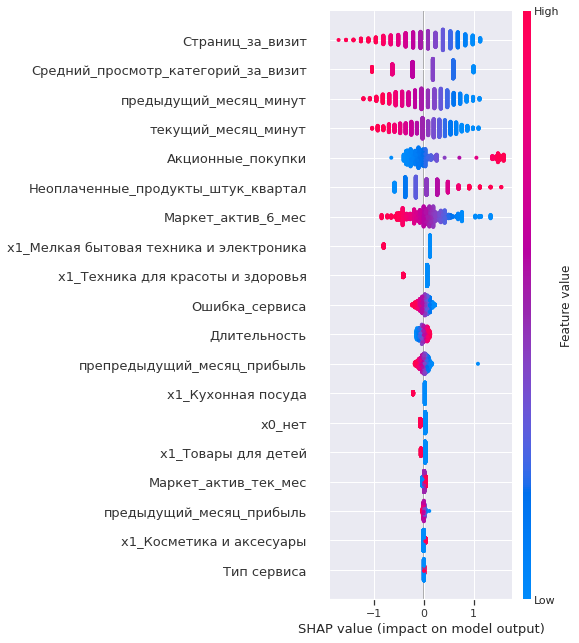

In [37]:
shap.summary_plot(shap_values) 

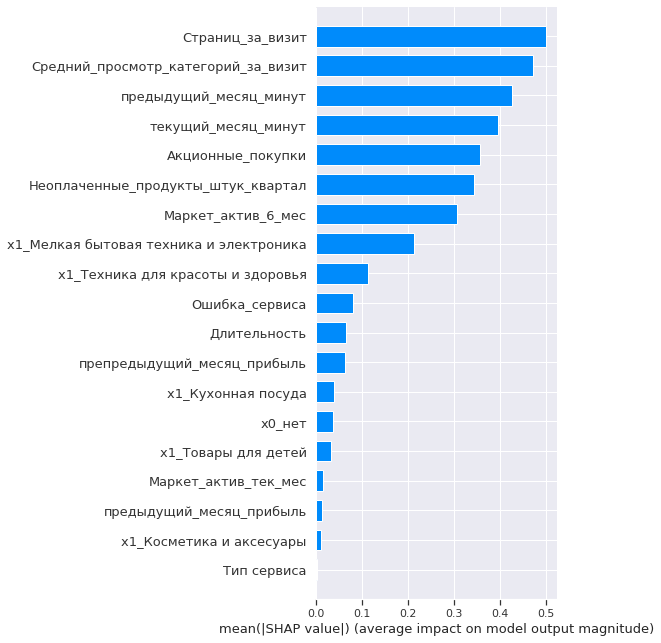

In [38]:
shap.summary_plot(shap_values, plot_type='bar') 

<div class="alert alert-success">
<b>ОТЛИЧНО! 👍</b>

Молодец, здесь ты делаешь то, что я редко обычно встречаю в проектах (я про визуализацию признаков, которые модель "посчитала" важными. Почему их анализ важен и полезен (несколько причин, почему важно тщательно "рассматривать" признаки):

1. **Информативность**: Признаки содержат информацию, которая помогает модели делать предсказания. Некоторые признаки могут быть более информативными, чем другие, и могут иметь сильное влияние на результаты модели. Понимание, какие признаки являются наиболее информативными, поможет сосредоточить усилия на сборе и анализе этих признаков, что в конечном итоге может привести к лучшим предсказаниям модели.

2. **Устранение шума и избыточности**: Некоторые признаки могут содержать шумовую или избыточную информацию, которая может негативно повлиять на работу модели. Анализ и отсев таких признаков помогут улучшить качество модели, устранить возможное переобучение и улучшить ее способность обобщать данные.

3. **Раскрытие взаимосвязей**: Изучение признаков может помочь обнаружить скрытые взаимосвязи и зависимости в данных. Например, два признака могут быть слабо информативными сами по себе, но в комбинации могут образовывать сильный предиктор. Исследование и понимание взаимосвязей между признаками может привести к созданию более сложных, но более мощных моделей.

4. **Сокращение размерности**: Некоторые наборы данных могут содержать большое количество признаков, и это может стать проблемой для обучения моделей. Сокращение размерности путем отбора наиболее важных признаков позволяет сократить вычислительную сложность, снизить вероятность переобучения и улучшить интерпретируемость модели.

5. **Интерпретируемость**: Понимание важности признаков также помогает интерпретировать результаты модели. Если мы знаем, какие признаки оказывают наибольшее влияние на предсказания, мы можем сделать более осознанные выводы и принимать меры на основе результатов   
</div>


#### Выводы
- Признаки "Тип Сервиса", "Кометика и аксесуары", "предыдущий_месяц_прибыль","Маркет_актив_тек_мес","x1_Товары для детей","x0_нет","x1_Кухонная посуда" имеют низкое влияние на целевой признак

- Признаки "Страниц_за_визит", "Средний_просмотр_категорий_за_визит","предыдущий_месяц_минут","текущий_месяц_минут","Акционные_покупки","Неоплаченные_продукты_штук_квартал", "Маркет_актив_6_мес" сильнее всего влияют на целевой признак
- На целевой признак, с бизнесовой точки зрения, очень влияет продуктовое повидение и повидения клиента на сайте 

<div class="alert alert-success">
<b>ОТЛИЧНО! 👍</b>

Экспертный вывод по графикам! Не просто красивые картинки построены, но описаны те моменты, которые дата-сайентист видит в них!
</div>

### Сегментация покупателей
<a id='8'></a>

<div class="alert alert-success">
<b>ОТЛИЧНО! 👍</b>

Сразу скажу, что в этом разделе ошибок быть не может ))) Всё потому, что грамотный и вдумчивый исследователь данных (*а ты собственно к этому моменту доказываешь, что визуализацией данных владеешь + видением трендов и закономерностей (на основе этих графиков) обладаешь*) - с почти 100%ой вероятностью **СМОЖЕТ** провести исследование групп покупателей, да и сделать конкретные предложения по работе с этими сегментами для увеличения профита Компании.

Но тем не менее, несмотря на то, что анализ клиентов в этом разделе не определяется жёстко в ТЗ - позволю  накидать несколько моментов про то, как это вижу я:
    
1. Выбираем сегмент и объясняем почему мы его выбрали. Тут делаем упор на бизнес - составляющую (мы ведь всем этим занимаемся не в сферическом вакууме, а для повышения экономической эффективности) и логику. Пример:

    "нас интересуют богатенькие клиенты, поэтому...", "нас интересуют те для кого модель предсказала высокую вероятность ухода, потому что...", "нас интересуют богатенькие и уходящие, потому что..."

- Или ориентируемся на результаты оценки важности признаков. Пример:

    "акционные покупки не показали высокую значимость на графиках shap, но если приглядеться, то yf графике beeswarm мы видим очень четкое разделение: высокие акционные покупики - высокая вероятность снижения, значит мы можем..." 

2.  У нас есть файл money, в нем содержится важная информация о прибыльности клиентов. Это наверно самый важный параметр с точки зрения бизнеса: клиент может много покупать, но прибыльность от него будет небольшой, или наоборот клиент может мало покупать, но он покупает товары которые продавать магазину выгодно. Чувствуешь разницу?! Стоит обогатить наши данные этой информацией
    
3. Используем результаты моделирования, а иначе зачем мы все это делали?!  Можно использовать результат predict_proba посмотрев на уверенность модели в том что клиент снижает активность - вот и вариант сегментации.  Можно использовать модель как источник вдохновения для выбора признаков (если модель считает признак важным для прогноза активности, то логично посмотреть на него поближе). Можно приглядеться на графики shap.beeswarm, увидев там что то интересное. Или можно все это использовать вместе.  Кстати можно подглядеть внутрь моделей не только с помощью shap, но и построить [plot_tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html) и там подсмотреть  комбинацию признаков с конкретными порогами, сделав упор на признаки - причины. Например проанализировав   plot_tree мы можем увидеть что для такой то группы товаров, при таком то значении акционных покупок и при таком то сервисе, высока доля не снижающих активность клиентов (ничего такого на самом деле нет, это просто пример). И мы сможем сделать более сложные маркетинговые предложения.

4. После выбора сегмента мы можем посмотреть усредненный портрет клиентов попавших в него, но сами по себе цифры нас не интересуют, нас интересует разница с клиентами не попавшими в сегмент. поэтому стоит проанализировать сегмент, указать на его отличия от остальных. для этого отлично подойдут графики countplot/pie (для категориальных) и гистограмму или boxplot (для количественных), а разбивке "наш сегмент" - "не наш сегмент"

5. И в конце составляем индивидуальные маркетинговые предложения для выбранного сегмента - иначе для чего мы всё это делали!?  При этом  выводы не должны быть слишком общими, напрмиер предложение "предложить акцию", это слишком общее предложение, лучше указать для кого, по какой группе товаров итп итд
    
p.s. еще можно посмотреть на динамику выручки по месяцам, в группировке по категориальным признакам (популярная категория, тип сервиса, разрешить сообщить), возможно тут получится увидеть что то интересное и сделать какие то маркетинговые предложения. Отслеживание динамики, как и сравнение, отличный способ найти в данных что то интересное.
</div>

На данном этапе выбераем покупателей с вероятностью 80% снижения покупательской активности, и сделаем анализ по ним 

In [39]:
full_df = pd.concat([X_train, X_test], axis=0)

predict_probas = grid.predict_proba(full_df)[:,1]
predicts = grid.predict(full_df)

full_df['probas'] = predict_probas
full_df['predicts'] = label_encoder.inverse_transform(predicts)

full_df = full_df.merge(df['id'], left_index=True, right_index=True).sort_index()
full_df = full_df.merge(money,on='id')

In [40]:
segmented_clients = full_df[(full_df['probas']>=0.8)&(full_df['Прибыль']>3)]

In [41]:
segmented_clients

,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,предыдущий_месяц_прибыль,препредыдущий_месяц_прибыль,предыдущий_месяц_минут,текущий_месяц_минут,probas,predicts,id,Прибыль
1,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,5216.0,4472.0,12,10,0.878038,Снизилась,215349,4.16
4,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,5807.5,4594.0,8,11,0.948975,Снизилась,215352,4.21
8,стандарт,да,4.2,4,192,0.14,Косметика и аксесуары,2,2,1,3,4146.5,4433.0,6,7,0.916337,Снизилась,215356,4.93
9,стандарт,да,3.9,5,154,0.00,Техника для красоты и здоровья,3,3,9,5,0.0,0.0,12,6,0.823037,Снизилась,215357,4.66
14,премиум,да,4.2,4,438,0.74,Домашний текстиль,3,4,6,4,4314.0,4765.0,13,13,0.866725,Снизилась,215362,3.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585,стандарт,да,4.6,4,316,0.95,Косметика и аксесуары,2,5,6,13,6102.0,5532.0,11,10,0.848659,Снизилась,215933,4.05
1023,стандарт,нет,3.3,3,414,0.94,Домашний текстиль,2,1,5,9,5362.5,5124.0,14,10,0.837143,Снизилась,216371,5.35
1049,стандарт,да,4.2,5,199,0.94,Товары для детей,4,2,6,4,3846.0,4471.0,14,11,0.808272,Снизилась,216397,4.75
1085,стандарт,нет,4.0,3,788,0.23,Товары для детей,2,3,4,7,4752.0,4884.0,9,5,0.857139,Снизилась,216433,5.03


In [42]:
segmented_clients['Популярная_категория'].value_counts(normalize=True)*100

Товары для детей                        32.432432
Косметика и аксесуары                   21.235521
Домашний текстиль                       19.691120
Кухонная посуда                         14.285714
Техника для красоты и здоровья           8.108108
Мелкая бытовая техника и электроника     4.247104
Name: Популярная_категория, dtype: float64

Выводы:
1. По результатам модели вывели 259 пользователей с хорошей прибыльностью, у которые с вероятностью больше 80% снизится покупательская активность 
2. Рекомендуется перодоставить скидки или промокоды по категориям Товары для детей, Косметика и аксесуары, Техника для красоты и здоровья так как модель акционные покупки играют важную роль для целевого признака 
3. Выше перечисленные категории относятся к FMCG, а остальные Мелкая бытовая техника и электроника и Мелкая бытовая техника и электроника покупаются редко и для категории низкая активность это норма 